### sklearn.tree.DecisionTreeClassifier
* class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import  export_text , plot_tree
iris = load_iris()

X = iris.data
y = iris.target 

X_train , X_test , y_train, y_test = train_test_split(X , y , test_size=0.3 ,  random_state=42)

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10 , random_state=42)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [24]:
dt.feature_importances_

array([0.        , 0.        , 0.92581271, 0.07418729])

In [25]:
r = export_text(dt , feature_names=iris.feature_names)

In [26]:
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.60
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.60
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



[Text(0.3333333333333333, 0.9, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.7, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.5, 'x[3] <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.5, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.7777777777777778, 0.3, 'x[2] <= 4.85\ngini = 0.059\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.8888888888888888, 0.1, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

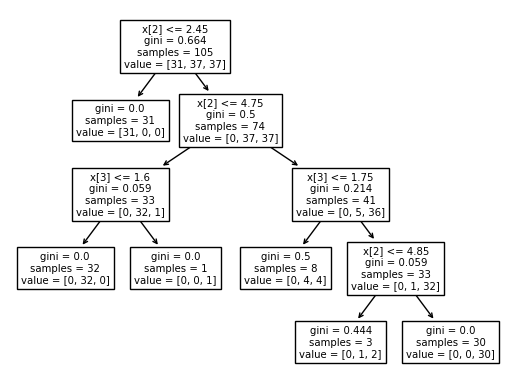

In [27]:
plot_tree(dt)

In [28]:
from sklearn.tree import export_graphviz

export_graphviz(dt , out_file="tree.dot",  class_names=iris.target_names , feature_names=iris.feature_names , impurity=True, filled=True)

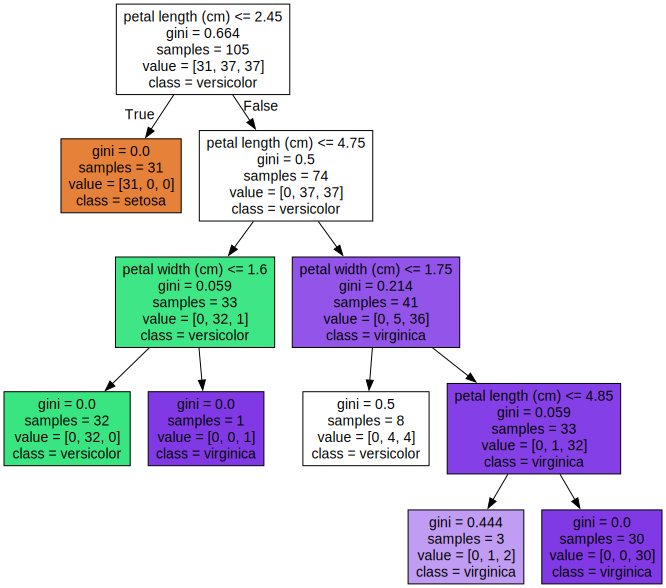

In [29]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)